## 1. Overview

The goal of this notebook is to explore trends in Canadian income and housing affordability over time.  
Specifically, this analysis examines:

- **Median household income** and how it has evolved since 1976  
- **Average rent prices** across Canada since 1987  
- **Gender wage gap trends** based on available data from 2000 - 2023  
- **Inflation adjustments (CPI-based)** to express all monetary values in constant 2023 dollars, allowing fair comparisons across years  

This work builds on the previous data cleaning and CPI adjustment steps.  
The objective of this notebook is to visualize and interpret how real income and rent costs have changed over time, and to assess whether income growth has kept pace with the rising cost of living.

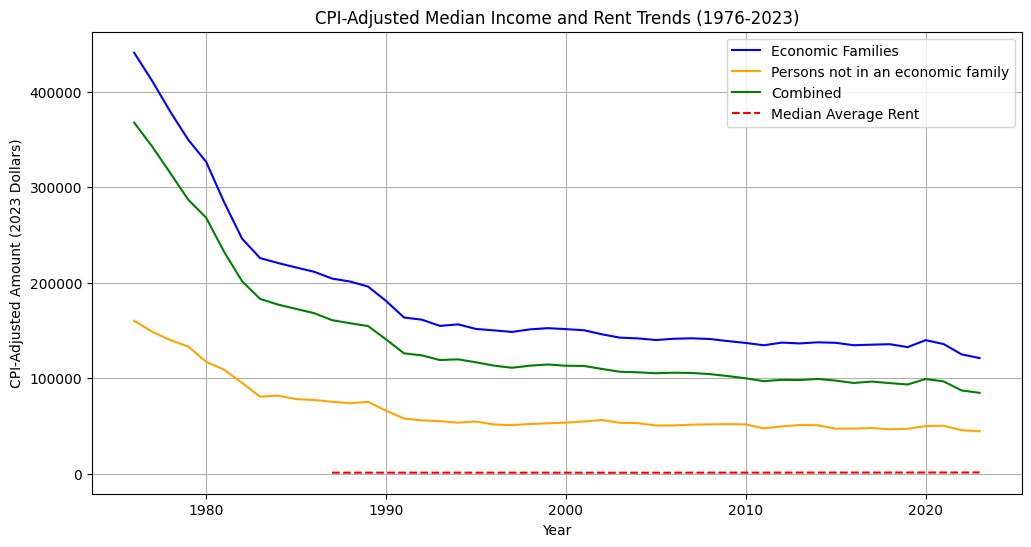

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load cleaned data
income_path = "../data/processed/median-income-clean-1976-2023.csv"
income_by_gender_path = "../data/processed/median-income-clean-2000-2023.csv"
rent_path = "../data/processed/median-rent-clean-1987-2023.csv"
cpi_path = "../data/processed/cpi-clean-all-items.csv"

income_df = pd.read_csv(income_path)
income_gender_df = pd.read_csv(income_by_gender_path)
rent_df = pd.read_csv(rent_path)
cpi_df = pd.read_csv(cpi_path)

# 3. CPI-adjusted income and rent trends
base_cpi = cpi_df.loc[cpi_df["year"] == 2023, "cpi_value"].values[0]
income_df_merged = pd.merge(income_df, cpi_df, on="year", how="left")
income_df_merged["Economic Families adjusted"] = (
    income_df_merged["Economic families"] * (base_cpi / income_df_merged["cpi_value"])
)
income_df_merged["Persons not in an economic family adjusted"] = (
    income_df_merged["Persons not in an economic family"] * (base_cpi / income_df_merged["cpi_value"])
)
income_df_merged["Economic families and persons not in an economic family adjusted"] = (
    income_df_merged["Economic families and persons not in an economic family"] * (base_cpi / income_df_merged["cpi_value"])
)

rent_df_merged = pd.merge(rent_df, cpi_df, on="year", how="left")
rent_df_merged["Median average rent adjusted"] = (
    rent_df_merged["median_avg_rent_value"] * (base_cpi / rent_df_merged["cpi_value"])
)

# 4. Plot CPI-adjusted income and rent trends
plt.figure(figsize=(12, 6))
plt.plot(income_df_merged["year"], income_df_merged["Economic Families adjusted"], label="Economic Families", color="blue")
plt.plot(income_df_merged["year"], income_df_merged["Persons not in an economic family adjusted"], label="Persons not in an economic family", color="orange")
plt.plot(income_df_merged["year"], income_df_merged["Economic families and persons not in an economic family adjusted"], label="Combined", color="green")
plt.plot(rent_df_merged["year"], rent_df_merged["Median average rent adjusted"], label="Median Average Rent", color="red", linestyle="--")
plt.title("CPI-Adjusted Median Income and Rent Trends (1976-2023)")
plt.xlabel("Year")
plt.ylabel("CPI-Adjusted Amount (2023 Dollars)")
plt.legend()
plt.grid()
plt.show()

